### pendel

Text(0.5, 1.0, "$\\theta'' = -\\theta$")

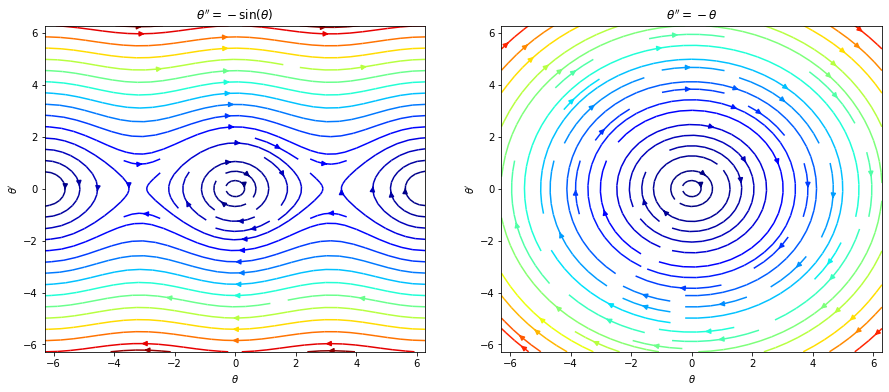

In [88]:
import numpy as np
from matplotlib import pyplot as plt

x = np.linspace(-2*np.pi, 2*np.pi, 41)
y = np.linspace(-2*np.pi, 2*np.pi, 41)
X, Y = np.meshgrid(x, y)
dX = Y

dY1 = -np.sin(X)
energy1 = 0.5*Y**2 -np.cos(X)

dY2 = -X
energy2 = 0.5*(X**2 + Y**2)

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
ax1.streamplot(X,Y,dX, dY1, color=energy1, density=1., cmap='jet', arrowsize=1)
ax2.streamplot(X,Y,dX, dY2, color=energy2, density=1., cmap='jet', arrowsize=1)

ax1.set_xlabel(r'$\theta$')
ax1.set_ylabel(r"$\theta'$")
ax1.set_title(r"$\theta'' = -\sin(\theta)$")
ax2.set_xlabel(r'$\theta$')
ax2.set_ylabel(r"$\theta'$")
ax2.set_title(r"$\theta'' = -\theta$")

#fig.savefig('3_faseplott')

MovieWriter ffmpeg unavailable; using Pillow instead.


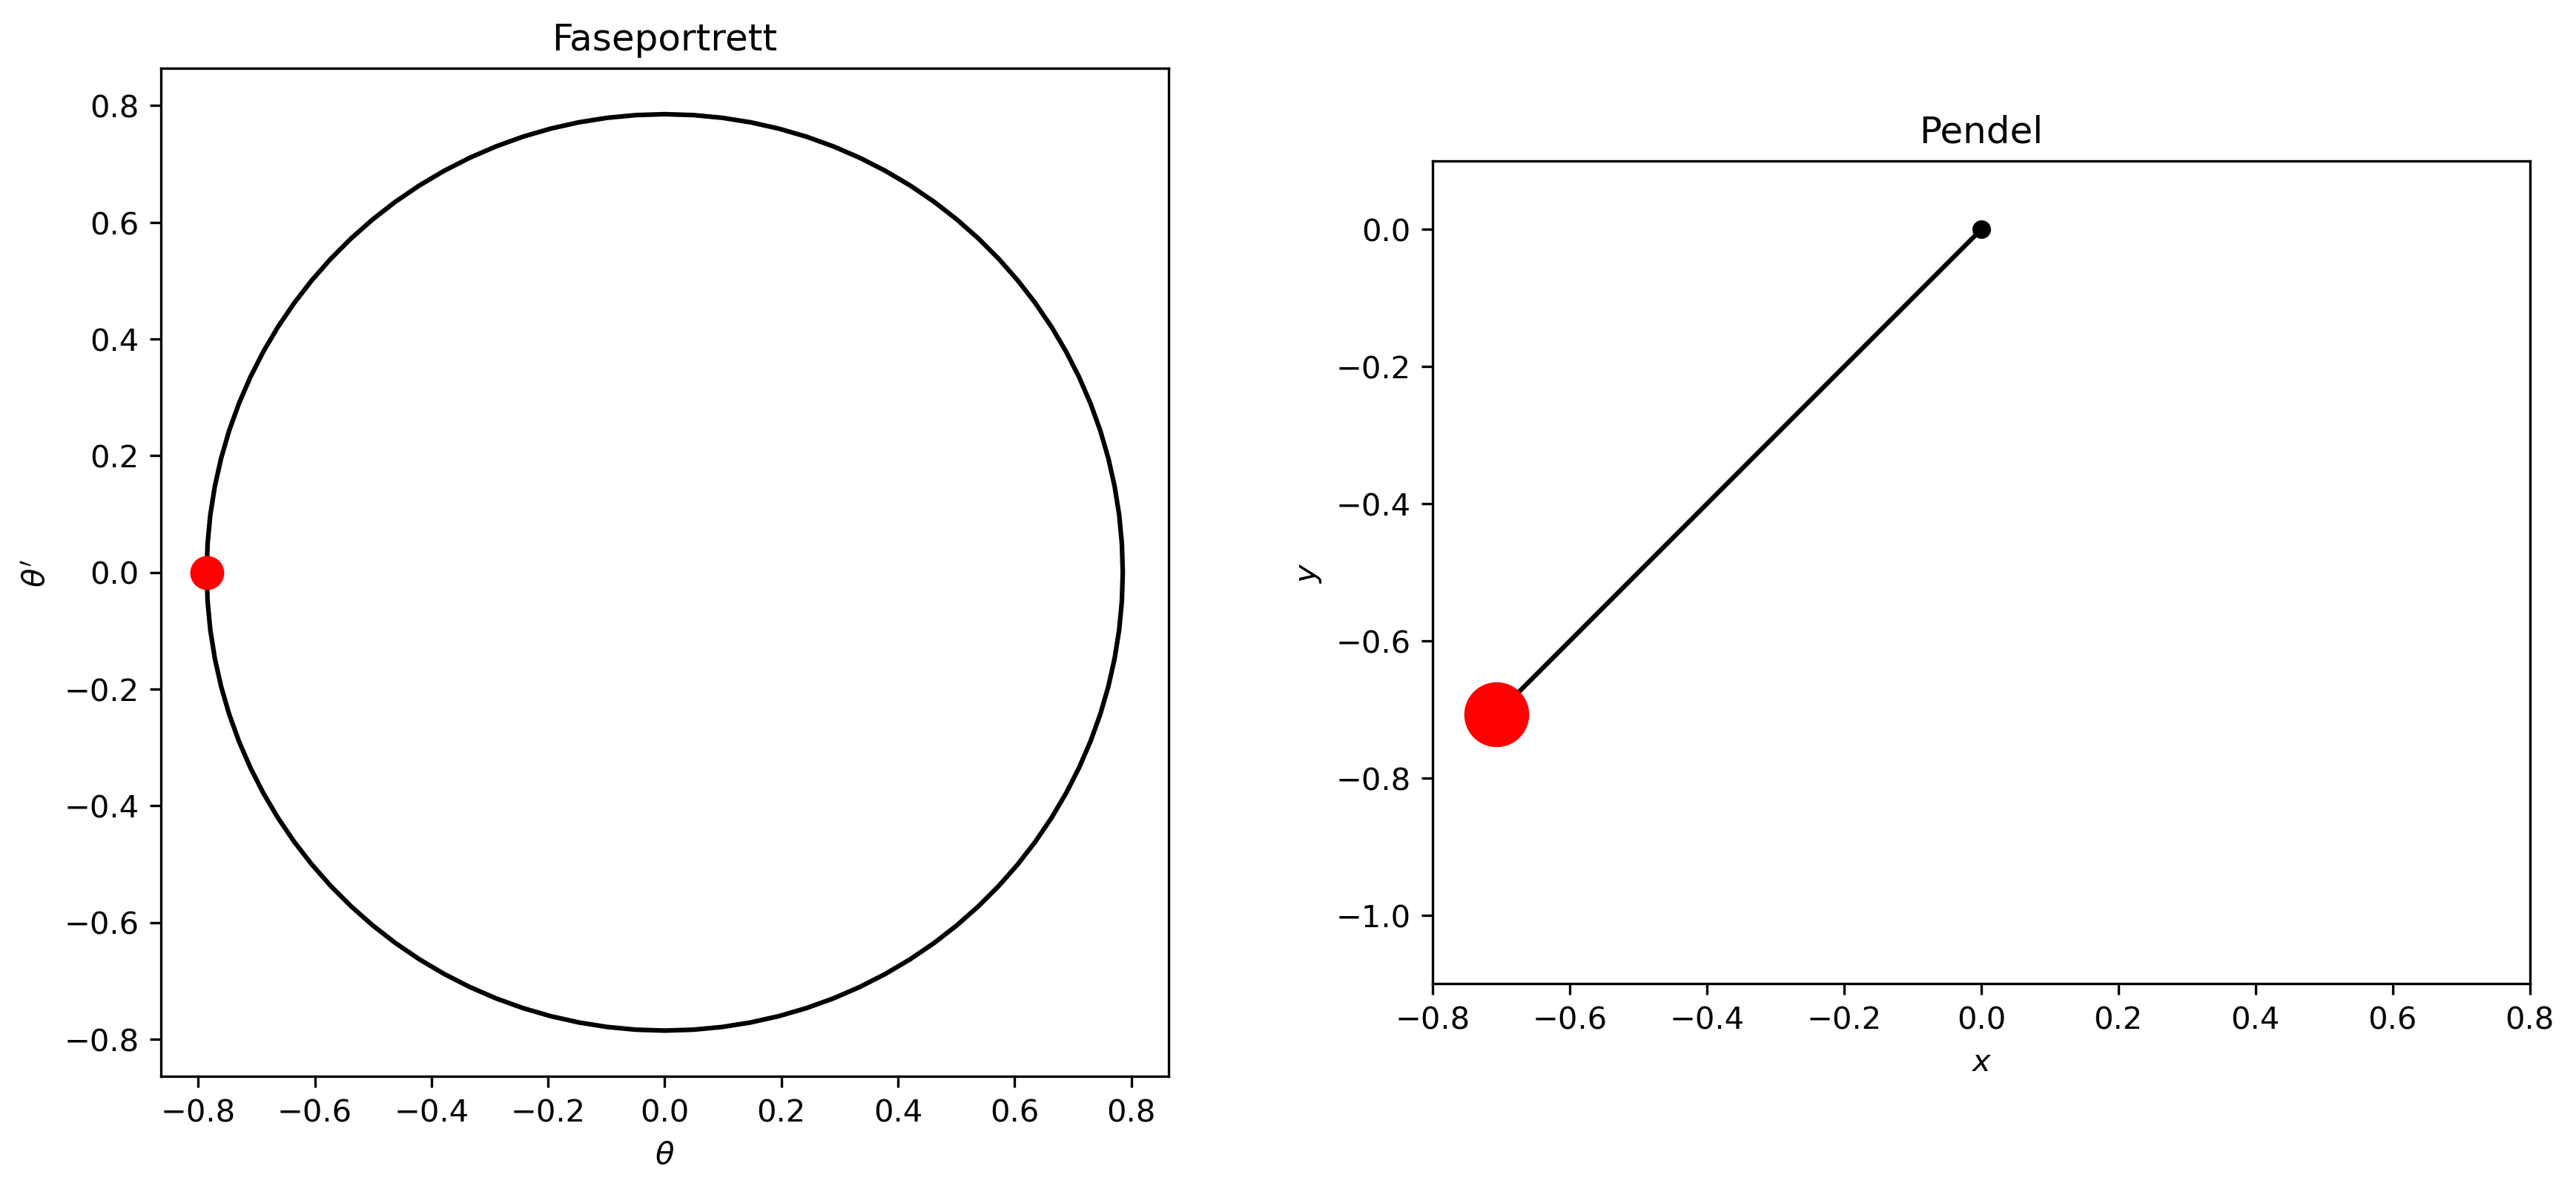

In [169]:
import matplotlib.animation as animation

theta0 = -np.pi/4
dtheta0 = 0

def theta(t):
    return theta0*np.cos(t) + dtheta0*np.sin(t)

def dtheta(t):
    return -theta0*np.sin(t) + dtheta0*np.cos(t)
    
tk = np.linspace(0,2*np.pi,101)
thetak = theta(tk)
dthetak = dtheta(tk)

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,6),dpi=300)

ax1.plot(thetak,dthetak,'k')
ax1.set_xlabel(r'$\theta$')
ax1.set_ylabel(r"$\theta'$")
ax1.set_title(r"Faseportrett")
ax1.set_aspect('equal')

ax2.plot(0,0,'ko',markersize=5)
ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r"$y$")
ax2.set_title(r"Pendel")
ax2.set_aspect('equal')
                              
ax2.set_xlim([-0.8,0.8])
ax2.set_ylim([-1.1,0.1])

line1, = ax1.plot(thetak[0],dthetak[0],'ro',markersize=10)
line2, = ax2.plot([0,np.sin(thetak[0])],[0,-np.cos(thetak[0])],'k')
line3, = ax2.plot(np.sin(thetak[0]),-np.cos(thetak[0]),'ro',markersize=20)

def animate(i):
    line1.set_data([thetak[i],dthetak[i]])
    line2.set_data([0,np.sin(thetak[i])],[0,-np.cos(thetak[i])])
    line3.set_data(np.sin(thetak[i]),-np.cos(thetak[i]))
    return line1, line2, line3

ani = animation.FuncAnimation(fig, animate, interval=20, save_count=101)

ani.save("3_pendel_illust.gif")

NameError: name 'tm' is not defined

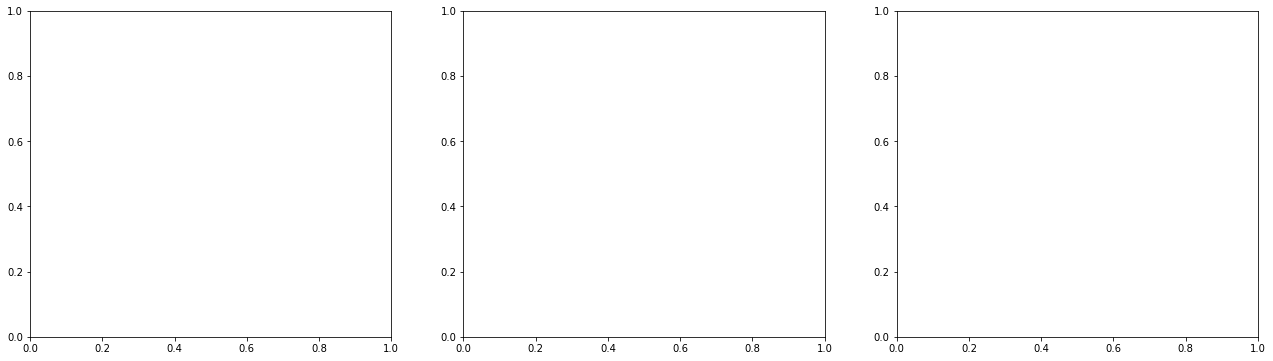

In [168]:
theta0 = -np.pi/4 # startvinkel
phi0 = 0 #start-vinkelhastighet

T = 4*np.pi # slutt-tidspunkt
N = 100 # antall steg med Euler
h = T/N # skrittlengde
tn = np.linspace(0,T,N+1)

Ye = np.zeros([N+1,2]) # liste med verdier for Eulers metode
Ye[0,0] = theta0
Ye[0,1] = phi0

Yi = np.copy(Ye) # tilsvarende verdier for implisitt Euler
Ys = np.copy(Ye) # ... semiimplisitt Euler

for k in range(0,N): # N steg med Eulers metode for opphavelig ligning
    # eksplisitt Euler
    Ye[k+1,0] = Ye[k,0] + h*Ye[k,1]
    Ye[k+1,1] = Ye[k,1] - h*(omega**2)*Ye[k,0]
    
    # implisitt Euler
    Yi[k+1,0] = ( Yi[k,0] + h*Yi[k,1] )/(1+(omega*h)**2)
    Yi[k+1,1] = ( Yi[k,1] - h*(omega**2)*Yi[k,0] )/(1+(omega*h)**2)
    
    # semiimplisitt Euler
    Ys[k+1,1] = Ys[k,1] - h*(omega**2)*Ys[k,0]
    Ys[k+1,0] = Ys[k,0] + h*Ys[k+1,1]
    
# linearisert ligning
fig2, (ax21,ax22,ax23) = plt.subplots(1,3,figsize=(22,6))
ax21.plot(tm,Y(tm),'k')
ax21.plot(tn, Ye[:,0],'.')
ax21.plot(tn, Yi[:,0],'x')
ax21.plot(tn, Ys[:,0],'+')
ax21.set_xlabel(r'$t$')
ax21.legend(['eksakt','eksplisitt Euler','implisitt Euler','symplektisk Euler'])
ax21.set_title(r'Vinkelutslag $\theta$')

ax22.plot(tm,dY(tm),'k')
ax22.plot(tn, Ye[:,1],'.')
ax22.plot(tn, Yi[:,1],'x')
ax22.plot(tn, Ys[:,1],'+')
ax22.set_xlabel(r'$t$')
ax22.legend(['eksakt','eksplisitt Euler','implisitt Euler','semiimplisitt Euler'])
ax22.set_title(r"Vinkelhastighet $\theta'$")

ax23.plot(Y(tm),dY(tm),'k') # eksakt løsning av forenklet ligning
ax23.plot(Ye[:,0],Ye[:,1],'.') # approksimasjoner gitt av Eulers metode
ax23.plot(Yi[:,0],Yi[:,1],'x')
ax23.plot(Ys[:,0],Ys[:,1],'+')
ax23.legend(['eksakt','eksplisitt Euler','implisitt Euler','semiimplisitt Euler'])
ax23.set_xlabel(r'$\theta$')
ax23.set_ylabel(r"$\theta'$")
ax23.set_title(r"Faseportrett")

#fig2.savefig('3_pendel_lincomp')

In [ ]:
# pendler
import matplotlib.animation as animation

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(22,6),dpi=300)

ax1.plot(0,0,'ko',markersize=5)
ax2.plot(0,0,'ko',markersize=5)
ax3.plot(0,0,'ko',markersize=5)

ax1.set_xlim([-1.1,1.1])
ax1.set_ylim([-1.1,0.3])
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r"$y$")
ax1.set_title(r"Eksplisitt Euler")
ax1.set_aspect('equal')

ax2.set_xlim([-1.1,1.1])
ax2.set_ylim([-1.1,0.3])
ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r"$y$")
ax2.set_title(r"Implisitt Euler")
ax2.set_aspect('equal')

ax3.set_xlim([-1.1,1.1])
ax3.set_ylim([-1.1,0.3])
ax3.set_xlabel(r'$x$')
ax3.set_ylabel(r"$y$")
ax3.set_title(r"Semiimplisitt Euler")
ax3.set_aspect('equal')


#ax.set_title(r"Pendel")

line11, = ax1.plot([0,np.sin(Ye[0,0])],[0,-np.cos(Ye[0,0])],'k')
line12, = ax1.plot(np.sin(Ye[0,0]),-np.cos(Ye[0,0]),color='tab:blue',marker='o',markersize=20)

line21, = ax2.plot([0,np.sin(Yi[0,0])],[0,-np.cos(Yi[0,0])],'k')
line22, = ax2.plot(np.sin(Yi[0,0]),-np.cos(Yi[0,0]),color='tab:orange',marker='o',markersize=20)

line31, = ax3.plot([0,np.sin(Ys[0,0])],[0,-np.cos(Ys[0,0])],'k')
line32, = ax3.plot(np.sin(Ys[0,0]),-np.cos(Ys[0,0]),color='tab:green',marker='o',markersize=20)

def animate(i):
    line11.set_data([0,np.sin(Ye[i,0])],[0,-np.cos(Ye[i,0])])
    line12.set_data(np.sin(Ye[i,0]),-np.cos(Ye[i,0]))
    
    line21.set_data([0,np.sin(Yi[i,0])],[0,-np.cos(Yi[i,0])])
    line22.set_data(np.sin(Yi[i,0]),-np.cos(Yi[i,0]))
    
    line31.set_data([0,np.sin(Ys[i,0])],[0,-np.cos(Ys[i,0])])
    line32.set_data(np.sin(Ys[i,0]),-np.cos(Ys[i,0]))
    
    return line11, line12, line21, line22, line31, line32

#ani = animation.FuncAnimation(fig, animate, interval=20, save_count=101)

#ani.save("3_pendel_lincomp2.gif")

In [ ]:
theta0 = -np.pi/2 # startvinkel
phi0 = 0 #start-vinkelhastighet

T = 5*np.pi # slutt-tidspunkt
N = 100 # antall steg med Euler
h = T/N # skrittlengde
tn = np.linspace(0,T,N+1)

Xe = np.zeros([N+1,2]) # liste med verdier for Eulers metode
Xe[0,0] = theta0
Xe[0,1] = phi0

Xs = np.copy(Xe)

for k in range(0,N):
    # eksplisitt Euler
    Xe[k+1,0] = Xe[k,0] + h*Xe[k,1]
    Xe[k+1,1] = Xe[k,1] - h*(omega**2)*np.sin(Xe[k,0])
    
    # semiimplisitt Euler
    Xs[k+1,1] = Xs[k,1] - h*(omega**2)*np.sin(Xs[k,0])
    Xs[k+1,0] = Xs[k,0] + h*Xs[k+1,1]

E = (phi0**2)/2 + 1 - np.cos(theta0)
print(E)
thetamax = np.arccos(1-E)

thetak = np.linspace(-thetamax,thetamax,201)

fig3, (ax31,ax32) = plt.subplots(1,2,figsize=(22,7))
plt.axis('equal')

ax31.plot(tn,Xe[:,0],'.')
ax31.plot(tn,Xs[:,0],marker='+', ls='', color='tab:green')
ax31.set_xlabel(r'$t$')
ax31.legend(['eksplisitt Euler','semiimplisitt Euler'])
ax31.set_title(r'Vinkelutslag $\theta$')

x = np.linspace(-3, 5, 41)
y = np.linspace(-3, 3, 41)
X, Y = np.meshgrid(x, y)
dX = Y

dY = -np.sin(X)
energy = 0.5*Y**2 -np.cos(X)

ax32.streamplot(X,Y,dX, dY, color=energy, density=1., cmap='jet', arrowsize=1)

#plt.plot(thetak,np.sqrt(2*np.abs(E-1+np.cos(thetak))),'k')
#plt.plot(thetak,-np.sqrt(2*np.abs(E-1+np.cos(thetak))),'k')

ax32.plot(Xe[:,0],Xe[:,1],'k.') # approksimasjoner gitt av Eulers metode
ax32.plot(Xs[:,0],Xs[:,1],'k+') # approksimasjoner gitt av Eulers metode
ax32.legend(['eksplisitt Euler','semiimplisitt Euler'])
ax32.set_xlabel(r'$\theta$')
ax32.set_ylabel(r"$\theta'$")
ax32.set_title(r"Faseportrett")

#fig3.savefig('3_pendel_comp')

In [ ]:
# pendler
import matplotlib.animation as animation

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,6),dpi=300)

ax1.plot(0,0,'ko',markersize=5)
ax2.plot(0,0,'ko',markersize=5)

ax1.set_xlim([-1.1,1.1])
ax1.set_ylim([-1.1,1.1])
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r"$y$")
ax1.set_title(r"Eksplisitt Euler")
ax1.set_aspect('equal')

ax2.set_xlim([-1.1,1.1])
ax2.set_ylim([-1.1,1.1])
ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r"$y$")
ax2.set_title(r"Semiimplisitt Euler")
ax2.set_aspect('equal')

line11, = ax1.plot([0,np.sin(Xe[0,0])],[0,-np.cos(Xe[0,0])],'k')
line12, = ax1.plot(np.sin(Xe[0,0]),-np.cos(Xe[0,0]),color='tab:blue',marker='o',markersize=20)

line21, = ax2.plot([0,np.sin(Xs[0,0])],[0,-np.cos(Xs[0,0])],'k')
line22, = ax2.plot(np.sin(Xs[0,0]),-np.cos(Xs[0,0]),color='tab:green',marker='o',markersize=20)

def animate(i):
    line11.set_data([0,np.sin(Xe[i,0])],[0,-np.cos(Xe[i,0])])
    line12.set_data(np.sin(Xe[i,0]),-np.cos(Xe[i,0]))
    
    line21.set_data([0,np.sin(Xs[i,0])],[0,-np.cos(Xs[i,0])])
    line22.set_data(np.sin(Xs[i,0]),-np.cos(Xs[i,0]))
    
    return line11, line12, line21, line22

#ani = animation.FuncAnimation(fig, animate, interval=60, save_count=101)

#ani.save("3_pendel_comp.gif")

#### Eulers metode - Retningsfelt

81


Text(475.7454545454544, 0.5, '$x$')

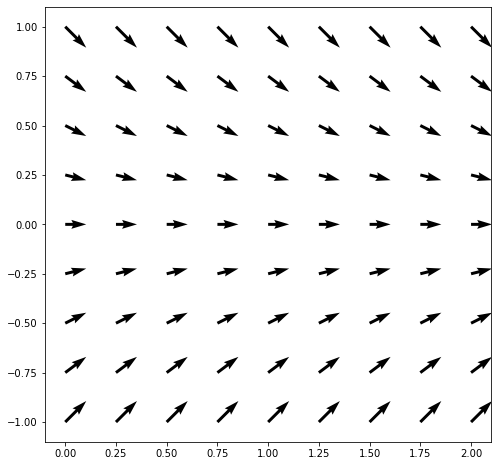

In [10]:
h = 1
x = np.linspace(0, 2, 9)
y = np.linspace(-1, 1, 9)
X, Y = np.meshgrid(x, y)

def f(t,x):
    return -x
    #return t-x

def sol(t,x0):
    return x0*np.exp(-t)
    #return t-1 + np.exp(-t)*(1+x0)

dX = X**0
dY = f(X,Y)

print(np.size(X))
h = 1
x0 = 0

fig1, ax = plt.subplots(figsize=(8,8))

#fig2, (ax1,ax2) = plt.subplots(1,2,figsize=(16,8))
m = 1
ax.quiver(X,Y,dX,dY)
#ax1.quiver(X[::m,::m],Y[::m,::m],dX[::m,::m],dY[::m,::m])
ax1.set_xlabel(r'$t$',size=12)
ax1.set_ylabel(r"$x$",size=12,rotation=0)

t_fine = np.linspace(0,2,101)

ax1.plot(t_fine[:-7],sol(t_fine[:-7],0))
ax1.plot(t_fine[:-19],sol(t_fine[:-19],1))
ax1.plot(t_fine,sol(t_fine,-1))

ax2.streamplot(X,Y,dX,dY)
ax2.set_xlabel(r'$t$',size=12)
ax2.set_ylabel(r"$x$",size=12,rotation=0)

#fig1.savefig('3_retningsfelt2.png')

153


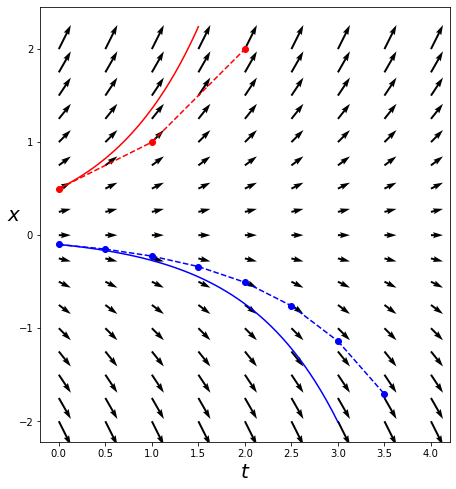

In [82]:
x = np.linspace(0, 4, 9)
y = np.linspace(-2, 2, 17)
X, Y = np.meshgrid(x, y)

def f(t,x):
    return x

dX = X**0
dY = f(X,Y)

print(np.size(X))
h = 1
x0 = 0.5
plt1, ax1 = plt.subplots(figsize=(8,8))
ax1.quiver(X,Y,dX,dY)
ax1.set_xlabel(r'$t$',size=20)
ax1.set_ylabel(r"$x$",size=20,rotation=0)
ax1.set_aspect('equal')

tk1 = np.linspace(0,1.5,51)
ax1.plot(tk1,0.5*np.exp(tk1),'red')
tk2 = np.linspace(0,3,51)
ax1.plot(tk2,-0.1*np.exp(tk2),'blue')

x0 = 0.5
xold = x0

ax1.plot(0,x0,marker='o',color='red')
for k in range(0,2):
    tk = k*h
    xnew = xold + h*f(tk,xold)
    ax1.plot([k*h,(k+1)*h],[xold,xnew],'red',linestyle='dashed')
    ax1.plot((k+1)*h,xnew,marker='o',color='red')
    xold = xnew

x0 = -0.1
xold = x0
h = 0.5

ax1.plot(0,x0,marker='o',color='blue')
for k in range(0,7):
    tk = k*h
    xnew = xold + h*f(tk,xold)
    ax1.plot([k*h,(k+1)*h],[xold,xnew],color='blue',linestyle='dashed')
    ax1.plot((k+1)*h,xnew,marker='o',color='blue')
    xold = xnew
    
#plt1.savefig('3_retningsfeltEuler.png')

#### Eulers metode - stabilitet

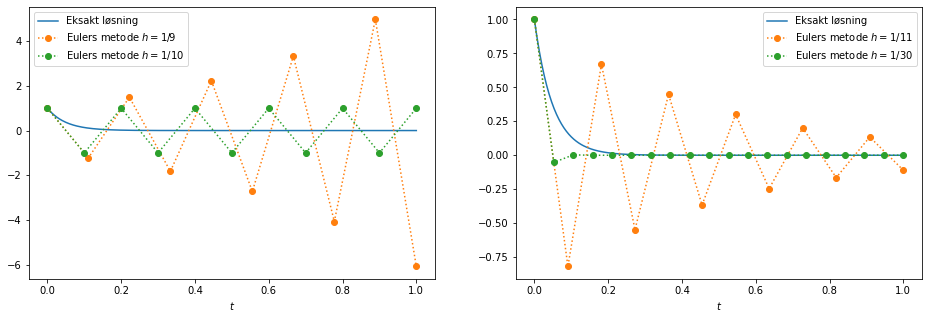

In [87]:
T = 1.0 # stopptid
x0 = 1 # startverdi
lam = -20.0 # lambda

N1 = 9 # antall steg
N2 = 10
N3 = 11
N4 = 30

h1 = T/N1 # steglengde
h2 = T/N2
h3 = T/N3
h4 = T/N4

x1 = np.zeros(N1+1)
x1[0] = x0

x2 = np.zeros(N2+1)
x2[0] = x0

x3 = np.zeros(N3+1)
x3[0] = x0

x4 = np.zeros(N4+1)
x4[0] = x0

for k in range(0,N1):
    x1[k+1] = x1[k] + lam*h1*x1[k]

for k in range(0,N2):
    x2[k+1] = x2[k] + lam*h2*x2[k]
    
for k in range(0,N3):
    x3[k+1] = x3[k] + lam*h3*x3[k]
    
for k in range(0,N4):
    x4[k+1] = x4[k] + lam*h4*x4[k]

t1 = np.linspace(0,T,N1+1)
t2 = np.linspace(0,T,N2+1)
t3 = np.linspace(0,T,N3+1)
t4 = np.linspace(0,T,N4+1)

tm = np.linspace(0,T,301) # jevnt fordelte punkter for plott av eksakt løsning

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,5))
ax1.plot(tm,np.exp(lam*tm)) # eksakt løsning
ax1.plot(t1,x1,':o')
ax1.plot(t2,x2,':o')
ax1.set_xlabel('$t$')
ax1.legend([r"Eksakt løsning",r"Eulers metode $h=1/9$",r"Eulers metode $h=1/10$"])

ax2.plot(tm,np.exp(lam*tm)) # eksakt løsning
ax2.plot(t3,x3,':o')
ax2.plot(t4,x4,':o')
ax2.set_xlabel('$t$')
ax2.legend([r"Eksakt løsning",r"Eulers metode $h=1/11$",r"Eulers metode $h=1/30$"])

#fig.savefig('3_stabilitet.png')